<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from VoteRules3D import VoteResult3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl

style.use('ggplot')
style.use('tableau-colorblind10')
style.use('seaborn-v0_8-paper')




In [1]:

def simulate(numTest,n,m,dimension):
    dict = {"n":[], "m":[], "Dimension":[], "Plurality":[], "Plurality Condorcet Criterion":[],
    "Copeland":[], "Copeland Condorcet Criterion":[], "STV":[], "STV Condorcet Criterion":[],
    "Borda":[], "Borda Condorcet Criterion":[], "STAR":[], "STAR Condorcet Criterion":[], "Plurality Veto": [], "Plurality Veto Condorcet Criterion": []}
    for i in range(numTest):
        test = VoteResult3D(n, m, dimension, distribution="uniform")
        dict["n"].append(n)
        dict["m"].append(m)
        dict["Dimension"].append(test.dimension)
        

        #winners 
        plurality = test.plurality()
        copeland = test.copeland()
        stv = test.STV()
        borda = test.borda()
        star = test.STAR()
        veto = test.pluralityVeto()
        dict["Plurality"].append(plurality)
        dict["Copeland"].append(copeland)
        dict["STV"].append(stv)
        dict["Borda"].append(borda)
        dict["STAR"].append(star)
        dict["Plurality Veto"].append(veto)

        dict["Plurality Condorcet Criterion"].append(test.condorcetCheck(plurality))
        dict["Copeland Condorcet Criterion"].append(test.condorcetCheck(copeland))
        dict["STV Condorcet Criterion"].append(test.condorcetCheck(stv))
        dict["Borda Condorcet Criterion"].append(test.condorcetCheck(borda))
        dict["STAR Condorcet Criterion"].append(test.condorcetCheck(star))
        dict["Plurality Veto Condorcet Criterion"].append(test.condorcetCheck(veto))

        

        
    df = pd.DataFrame(dict)
    df.to_csv('CondorcetCheck_uniform.csv', mode="a", header = None)

# Now you have a DataFrame df with the results of your simulations


In [21]:
# dimension = ["1D", "2D", "3D"]
# n=200
# marray = [3, 5, 20, 35]

# # for d in dimension:
# for m in marray:
#     simulate(1000, n, m, "1D")



In [5]:
main = pd.read_csv("CondorcetCheck.csv")

main

,Unnamed: 0,n,m,Dimension,Plurality,Plurality Condorcet Criterion,Copeland,Copeland Condorcet Criterion,STV,STV Condorcet Criterion,Borda,Borda Condorcet Criterion,STAR,STAR Condorcet Criterion,Plurality Veto,Plurality Veto Condorcet Criterion
0,0,200,2,1D,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True
1,1,200,2,1D,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True
2,2,200,2,1D,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True
3,3,200,2,1D,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True
4,4,200,2,1D,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,995,200,5,3D,Candidate 0,False,Candidate 4,True,Candidate 4,True,Candidate 4,True,Candidate 4,True,Candidate 4,True
16996,996,200,5,3D,Candidate 1,False,Candidate 0,True,Candidate 1,False,Candidate 1,False,Candidate 0,True,Candidate 1,False
16997,997,200,5,3D,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True
16998,998,200,5,3D,Candidate 0,False,Candidate 4,True,Candidate 4,True,Candidate 4,True,Candidate 4,True,Candidate 4,True


In [6]:
# Assuming you have a DataFrame 'main' and a target value 'True'
target_value = True

# Group by 'Distribution' and calculate the percentage of each method choosing the OPT
condorcetCheck = main.loc[main["Dimension"]=="3D"].groupby("m").agg(
    Plurality=('Plurality Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland=('Copeland Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STV=('STV Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR=('STAR Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda=('Borda Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto=('Plurality Veto Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

condorcetCheck

,m,Plurality,Copeland,STV,STAR,Borda,PluralityVeto
0,2,99.500000,100.0,99.400000,99.400000,99.500000,99.700000
1,3,89.889890,100.0,97.697698,97.797798,95.295295,98.798799
2,5,70.770771,100.0,92.192192,95.695696,91.191191,92.592593
3,20,21.580547,100.0,41.438703,37.183384,85.207700,71.327254
4,50,5.445026,100.0,14.345550,22.094241,83.874346,58.219895


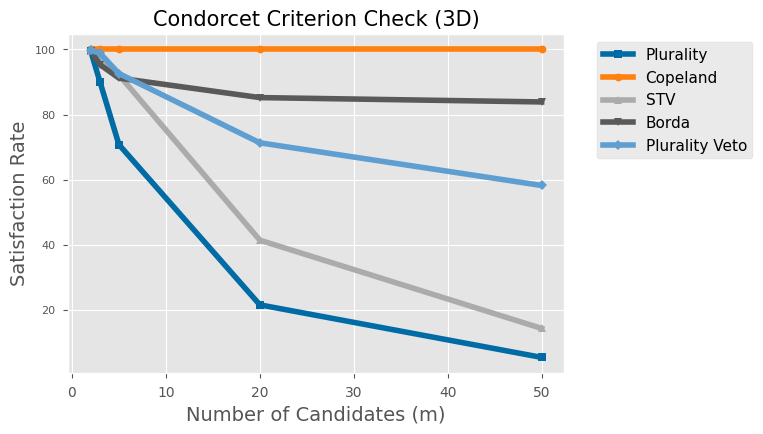

In [9]:
# import matplotlib.pyplot as plt
# df = condorcetCheck
# # List of columns you want to compare
# columns_to_co", "Copeland_percentage", "STV_percentage", "STAR_percentage", "Borda_percentage", "PluralityVeto_percentage"]

# # Transpose the DataFrame
# df = df.set_index("Dimension")[columns_to_compare].T

# # Plotting
# ax = df.plot(kind="bar", figsize=(10, 6))
# plt.xlabel("Method")
# plt.ylabel("Percentage")
# plt.title("Comparison of Percentages by Method and Dimension")
# plt.legend(title="Dimension", loc="upper left", bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.show()

#color palatte for the colorblind
CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
                 '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
styles1 = ['s-','o-','^-', 'v-','D-']


plt.plot(condorcetCheck.m, condorcetCheck["Plurality"], styles1[0], label="Plurality", color = CB_color_cycle[0], linewidth=4)
plt.plot(condorcetCheck.m, condorcetCheck["Copeland"], styles1[1], label="Copeland",  color = CB_color_cycle[1], linewidth=4)
plt.plot(condorcetCheck.m, condorcetCheck["STV"], styles1[2], label="STV", color = CB_color_cycle[2], linewidth=4)
plt.plot(condorcetCheck.m, condorcetCheck["Borda"], styles1[3], label="Borda", color = CB_color_cycle[3], linewidth=4)
plt.plot(condorcetCheck.m, condorcetCheck["PluralityVeto"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4], linewidth=4)

# Customize the plot
plt.xlabel("Number of Candidates (m)", fontsize=14)
plt.ylabel("Satisfaction Rate", fontsize=14)
plt.title("Condorcet Criterion Check (3D)", fontsize=15)
plt.xticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)

# # Show the plot
# plt.show()

# df = pd.DataFrame(condorcetCheck)
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# efficiency_co', 'Borda_percentage', 
#                       'PluralityVeto_percentage', 'STV_percentage', 'Copeland_percentage']
# voting_rules = ['Plurality', 'Borda', 'Plurality Veto', 'STV', 'Copeland']
# for i, efficiency_type in enumerate(efficiency_columns):
#     row = i // 2
#     col = i % 2
#     ax = axes[row, col]
#     ax.set_title("Condorcet Satisfaction Rate")
#     if efficiency_type in df.columns:
#         for m_value in sorted(df['m'].unique()):
#             df_m = df[df['m'] == m_value]
#             ax.plot(df_m['m'], df_m[efficiency_type], marker='o', label=f'm={m_value}')
#         ax.grid(True)
#     ax.set_xlabel('m (Number of Voters)')
#     ax.set_ylabel('IIA Satisfaction Rate')

# # Hide empty subplots
# if len(efficiency_columns) < 6:
#     for i in range(len(efficiency_columns), 6):
#         row = i // 2
#         col = i % 2
#         fig.delaxes(axes[row, col])

# plt.tight_layout(pad=3.0)
# plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left')
# plt.show()

In [10]:
# Assuming you have a DataFrame 'main' and a target value 'True'
target_value = True

# Group by 'Distribution' and calculate the percentage of each method choosing the OPT
condorcetCheck = main.groupby(["m", "Dimension"]).agg(
    Plurality=('Plurality Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland=('Copeland Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STV=('STV Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR=('STAR Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda=('Borda Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto=('Plurality Veto Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

condorcetCheck

,m,Dimension,Plurality,Copeland,STV,STAR,Borda,PluralityVeto
0,2,1D,99.800000,100.0,99.100000,98.700000,99.800000,99.700000
1,2,2D,99.600000,100.0,99.300000,99.300000,99.600000,99.500000
2,2,3D,99.500000,100.0,99.400000,99.400000,99.500000,99.700000
3,3,1D,70.800000,100.0,85.100000,90.500000,87.500000,94.300000
4,3,2D,85.600000,100.0,95.300000,97.200000,92.300000,97.000000
5,3,3D,89.889890,100.0,97.697698,97.797798,95.295295,98.798799
6,5,1D,43.900000,100.0,59.100000,78.400000,81.100000,87.300000
7,5,2D,60.220441,100.0,83.066132,92.685371,89.679359,90.080160
8,5,3D,70.770771,100.0,92.192192,95.695696,91.191191,92.592593
9,20,1D,11.445783,100.0,18.022088,30.020080,58.383534,79.166667


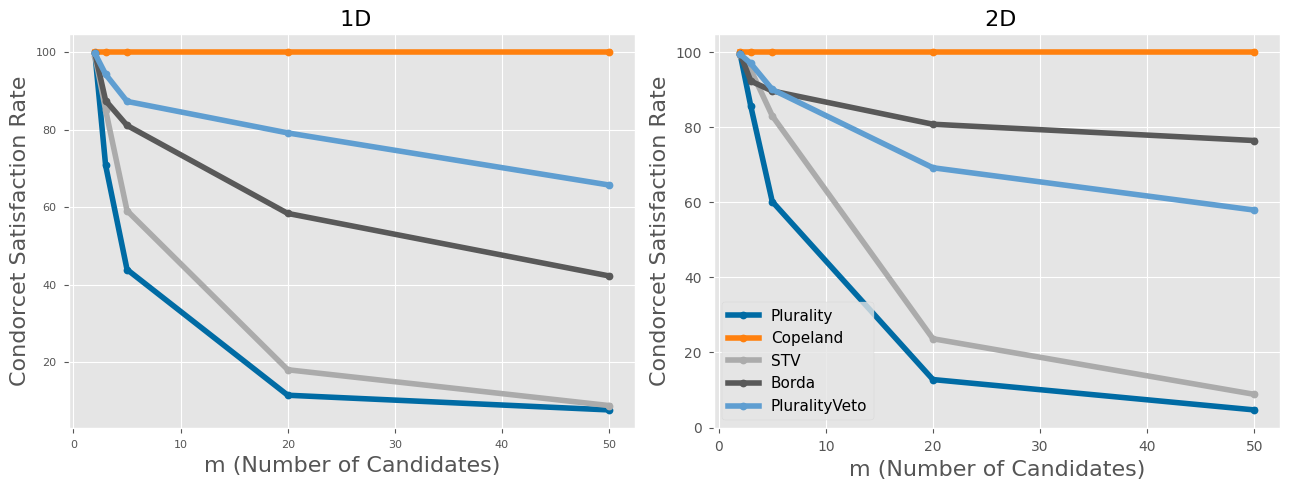

In [18]:
df = pd.DataFrame(condorcetCheck)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

efficiency_columns = ['Plurality', "Copeland",'STV', 
                       'Borda', 'PluralityVeto']


for i, dimension_value in enumerate(["1D","2D"]):
    df_dimension = df[df['Dimension'] == dimension_value]
    ax = axes[i]
    ax.set_title(f' {dimension_value}', fontsize=16)
    for efficiency_type in efficiency_columns:
        ax.plot(df_dimension['m'], df_dimension[efficiency_type], marker='o', label=efficiency_type, linewidth=4)
    ax.set_xlabel('m (Number of Candidates)', fontsize=16)
    ax.set_ylabel('Condorcet Satisfaction Rate', fontsize=16)
    ax.grid(True)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [4]:
main = pd.read_csv("CondorcetCheck2.csv")


In [5]:
# Assuming you have a DataFrame 'main' and a target value 'True'
target_value = True

# Group by 'Distribution' and calculate the percentage of each method choosing the OPT
condorcetCheck = main.loc[main["Dimension"]=="1D"].groupby(["m","n"]).agg(
    Plurality=('Plurality Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland=('Copeland Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STV=('STV Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR=('STAR Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda=('Borda Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto=('Plurality Veto Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

condorcetCheck

,m,n,Plurality,Copeland,STV,STAR,Borda,PluralityVeto
0,5,5,69.633333,100.0,79.833333,60.566667,88.266667,90.666667
1,5,25,50.900000,100.0,65.900000,69.700000,82.700000,89.100000
2,5,50,46.038114,100.0,59.478435,73.821464,81.243731,87.161484
3,5,75,46.100000,100.0,60.700000,74.200000,78.900000,88.500000
4,5,100,45.300000,100.0,60.800000,77.700000,81.800000,89.000000
5,5,200,43.900000,100.0,59.100000,78.400000,81.100000,87.300000
6,20,5,37.066667,100.0,48.500000,9.966667,71.466667,80.400000
7,20,25,19.600000,100.0,25.300000,21.900000,59.000000,68.700000
8,20,50,14.494265,100.0,20.125130,26.485923,55.787278,70.698644
9,20,75,15.700000,100.0,20.300000,27.800000,58.600000,73.800000


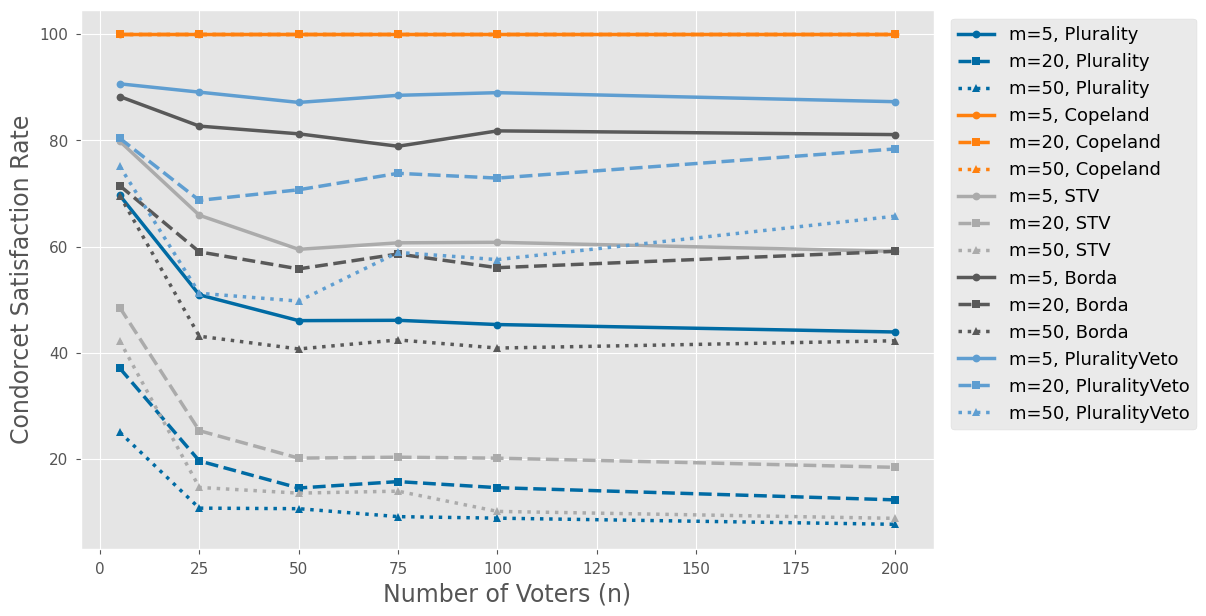

In [11]:
df = pd.DataFrame(condorcetCheck)

# Plotting
fig, ax = plt.subplots(figsize=(11, 7))

CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
                 '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
markers = ['o', 's', '^']  # Markers for different m values
linestyles = ['-', '--', ':']  # Line styles for different m values

voting_rules = ['Plurality', 'Copeland', 'STV', "Borda", 'PluralityVeto']

for j, efficiency_type in enumerate(voting_rules):
    for i, m_value in enumerate(sorted(df['m'].unique())):
        df_m = df[df['m'] == m_value]
        ax.plot(df_m['n'], df_m[efficiency_type], marker=markers[i], linestyle=linestyles[i], label=f'm={m_value}, {efficiency_type}', color=CB_color_cycle[j], linewidth=2.5)

# ax.set_title('Condorcet Efficiency vs. Number of Voters')
ax.set_xlabel('Number of Voters (n)', fontsize=17)
ax.set_ylabel('Condorcet Satisfaction Rate',fontsize=17)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()